## DW-Nominate

#### Links:

Legislator's Idealogical Scores

[DW-Nominate Legistator Data](https://voteview.com/data)

Methology

[DW-NOMINATE Scores With Bootstrapped Standard Errors](https://legacy.voteview.com/dwnomin.htm)

[NOMINATE (scaling method) - Wikipedia](https://en.wikipedia.org/wiki/NOMINATE_(scaling_method))

More Information

[GovTrack](https://www.govtrack.us/)



In [1]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style = "fivethirtyeight"
import json
import numpy as np
import seaborn as sns


In [4]:
f = open('HS116_members.json')
data = json.load(f)

In [5]:
[l["chamber"] for l in data[0:10]]

['House',
 'House',
 'House',
 'House',
 'House',
 'House',
 'House',
 'House',
 'House',
 'House']

In [6]:
bioguide_id, bioname, nominate_dim1, nominate_dim2 = [], [], [], []
for legislator in data:
    if legislator["chamber"] != "President":
        bioguide_id.append(legislator["bioguide_id"])
        bioname.append(legislator["bioname"].title())
        nominate_dim1.append(legislator["nominate_dim1"])
        nominate_dim2.append(legislator["nominate_dim2"])
bioguide_id, bioname, nominate_dim1, nominate_dim2 

(['R000575',
  'S001185',
  'R000591',
  'B001274',
  'B001289',
  'P000609',
  'A000055',
  'Y000033',
  'G000551',
  'K000368',
  'G000565',
  'S001183',
  'G000574',
  'B001302',
  'O000171',
  'L000589',
  'S001211',
  'C001087',
  'W000809',
  'H001072',
  'W000821',
  'P000197',
  'S001150',
  'D000598',
  'N000181',
  'S001156',
  'C001059',
  'M001163',
  'M001166',
  'M001165',
  'S001175',
  'M001177',
  'C001080',
  'G000559',
  'H001048',
  'B001270',
  'L000578',
  'H001068',
  'B001287',
  'C001094',
  'S001193',
  'B001285',
  'C001097',
  'R000599',
  'T000472',
  'L000579',
  'V000130',
  'P000608',
  'D000623',
  'A000371',
  'L000582',
  'T000474',
  'B001300',
  'C001112',
  'C001110',
  'K000389',
  'P000613',
  'G000585',
  'C001123',
  'C001124',
  'H001090',
  'H001087',
  'L000593',
  'P000618',
  'R000616',
  'W000187',
  'E000215',
  'R000486',
  'C000059',
  'L000397',
  'S000344',
  'L000551',
  'T000460',
  'N000179',
  'L000564',
  'P000593',
  'T000470',

In [7]:
dwnom_df = pd.DataFrame(data)

In [8]:
dwnom_df.head()

,bioguide_id,bioname,born,chamber,conditional,congress,died,district_code,icpsr,last_means,...,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,nominate_log_likelihood,nominate_number_of_errors,nominate_number_of_votes,occupancy,party_code,state_abbrev,state_icpsr
0,R000575,"ROGERS, Mike Dennis",1958,House,None,116,None,3,20301,,...,0.340,0.447,0.82542,-21.87301,6,114,,200,AL,41
1,S001185,"SEWELL, Terri",1965,House,None,116,None,7,21102,,...,-0.391,0.405,0.94791,-6.68759,5,125,,100,AL,41
2,R000591,"ROBY, Martha",1976,House,None,116,None,2,21192,,...,0.370,0.673,0.87644,-16.48605,4,125,,200,AL,41
3,B001274,"BROOKS, Mo",1954,House,None,116,None,5,21193,,...,0.611,-0.452,0.74620,-36.59590,17,125,,200,AL,41
4,B001289,"BYRNE, Bradley",1955,House,None,116,None,1,21376,,...,0.544,0.311,0.86133,-18.21152,5,122,,200,AL,41


In [9]:
dwnom_df["party_code"].unique()

array([200, 100, 328])

In [10]:
def colorize(row):
    return "blue" if row["party_code"]==100 else "red" if row["party_code"]==200 else "grey"

In [11]:
dwnom_df["party_color"] = dwnom_df.apply(colorize, axis=1)

In [12]:
dwnom_df.head()

,bioguide_id,bioname,born,chamber,conditional,congress,died,district_code,icpsr,last_means,...,nominate_dim2,nominate_geo_mean_probability,nominate_log_likelihood,nominate_number_of_errors,nominate_number_of_votes,occupancy,party_code,state_abbrev,state_icpsr,party_color
0,R000575,"ROGERS, Mike Dennis",1958,House,None,116,None,3,20301,,...,0.447,0.82542,-21.87301,6,114,,200,AL,41,red
1,S001185,"SEWELL, Terri",1965,House,None,116,None,7,21102,,...,0.405,0.94791,-6.68759,5,125,,100,AL,41,blue
2,R000591,"ROBY, Martha",1976,House,None,116,None,2,21192,,...,0.673,0.87644,-16.48605,4,125,,200,AL,41,red
3,B001274,"BROOKS, Mo",1954,House,None,116,None,5,21193,,...,-0.452,0.74620,-36.59590,17,125,,200,AL,41,red
4,B001289,"BYRNE, Bradley",1955,House,None,116,None,1,21376,,...,0.311,0.86133,-18.21152,5,122,,200,AL,41,red


In [13]:
years = []
for yr in range(1945, 2021, 2):
    years.append([yr, yr+2])
print(years[-5:])
print(len(years))
title = "{}th Congress ".format(dwnom_df["congress"][0])
print(title)

[[2011, 2013], [2013, 2015], [2015, 2017], [2017, 2019], [2019, 2021]]
38
116th Congress 


<Figure size 1440x1080 with 0 Axes>

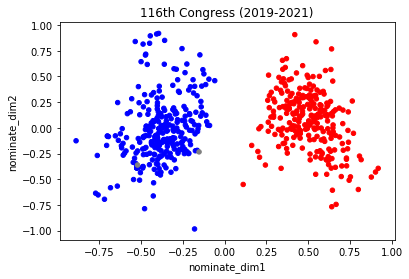

In [14]:
plt.figure(figsize=(20,15))
dwnom_df.plot("nominate_dim1", "nominate_dim2", kind="scatter", color=(dwnom_df["party_color"]))
title = "{}th Congress ({}-{})".format(dwnom_df["congress"][0], years[37][0], years[37][1])
plt.title(title)
plt.show()

In [108]:
def dw_data(year_start, year_end):
# Data fuction expects years to be passed as integers between 1789 to 2019
# Returns data and metadata as [[data.json, session, year], [...]
    if year_start%2 == 0:
        year_start -= 1
    if year_end%2 == 0:
        year_end += 1
    if year_start > year_end or year_start<1789 or year_end>2019:
        print("Error: Dates out of range")
    else:
        session_range = int((year_end - year_start)/2)+1
        dwnom_data_all = []
        session = 0
        for i in range(session_range):
            session = int((year_start - 1787)/2) + i
            years = [year_start + 2*i, year_start + 2*(i+1)]
            if session<10:
                url = "https://voteview.com/static/data/out/members/HS00{}_members.json".format(session)
            elif session<100:
                url = "https://voteview.com/static/data/out/members/HS0{}_members.json".format(session)
            elif session>=100:
                url = "https://voteview.com/static/data/out/members/HS{}_members.json".format(session)
            resp = requests.get(url)
            if resp.status_code != 200:
                raise ValueError("Error getting data from VoteView: Response Code {}".format(resp.status_code))
            data = json.loads(resp.text)
            dwnom_data_all.append([{'session':session}, {'years': years}, data])
    return dwnom_data_all

In [109]:
def ideology_viz(data):
# Reads json data from data all 
    bioguide_id, bioname, nominate_dim1, nominate_dim2, party_color = [], [], [], [], []
    data_session = data[2]
    for legislator in data_session:
        bioguide_id.append(legislator["bioguide_id"])
        bioname.append(legislator["bioname"].title())
        nominate_dim1.append(legislator["nominate_dim1"])
        nominate_dim2.append(legislator["nominate_dim2"])
        color = "blue" if legislator["party_code"]==100 else "red" if legislator["party_code"]==200 else "grey"
        party_color.append(color)
    session_data = {"bioguide_id": bioguide_id, "bioname": bioname, 
                    "nominate_dim1": nominate_dim1, "nominate_dim2": nominate_dim2, 
                    "party_color": party_color }
#     session_df = pd.DataFrame(session_data)
    plt.figure(figsize=(12, 10))
    plt.scatter(session_data["nominate_dim1"], session_data["nominate_dim2"])
#                 c=(session_data["party_color"]))
    plt.title("{}th Congress ({}-{})".format(data[0]["session"], data[1]["years"][0], data[1]["years"][1]))
    plt.show()

In [110]:
data_all = dw_data(2016, 2019)
    

In [111]:
data_all[1][:-1]

[{'session': 115}, {'years': [2017, 2019]}]

In [112]:
len(data_all)

3

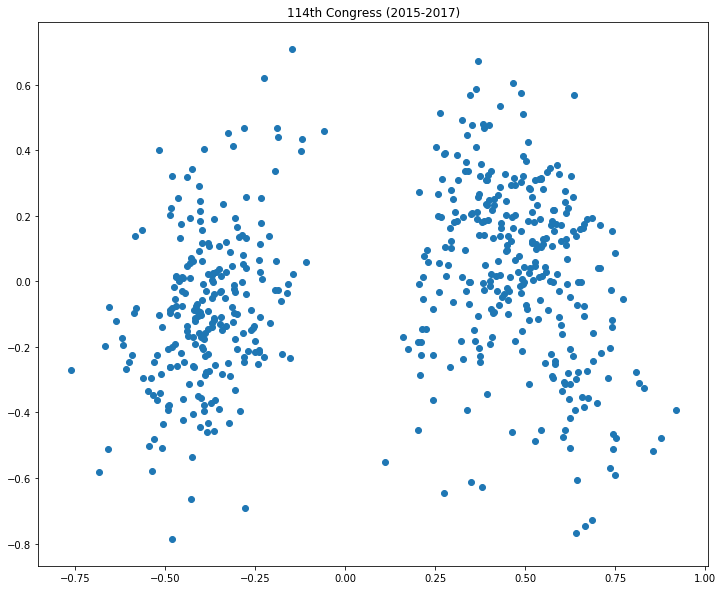

In [113]:
ideology_viz(data_all[0])

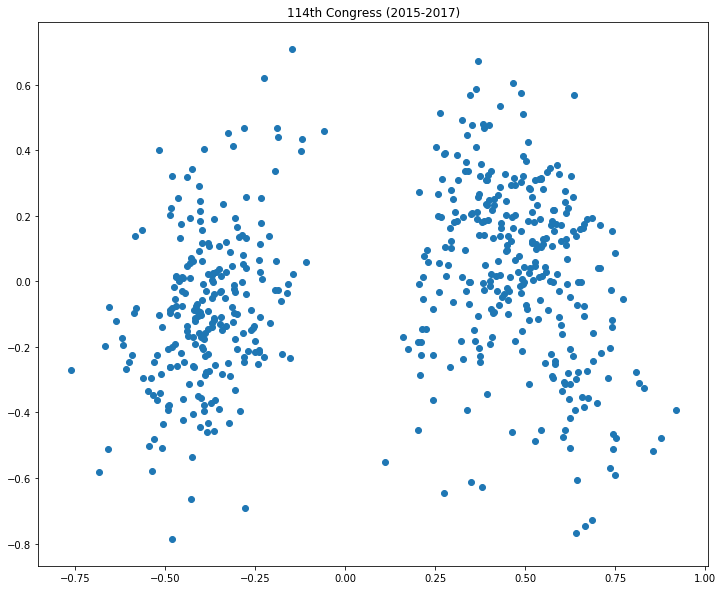

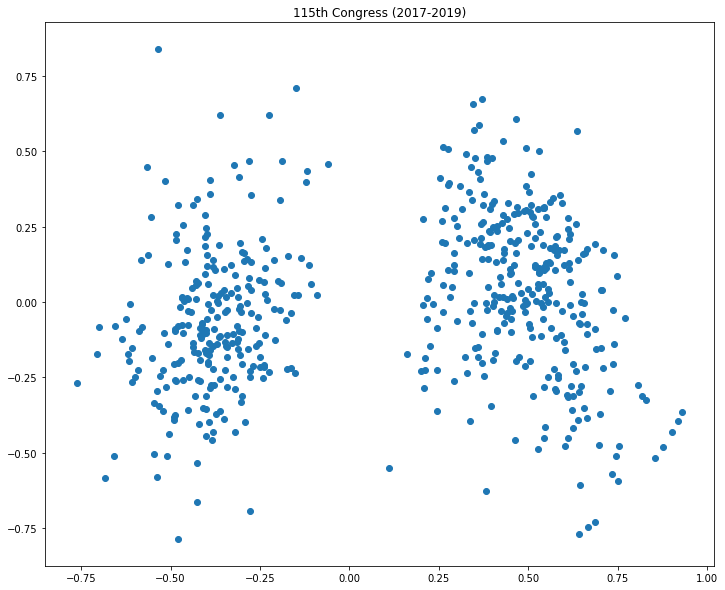

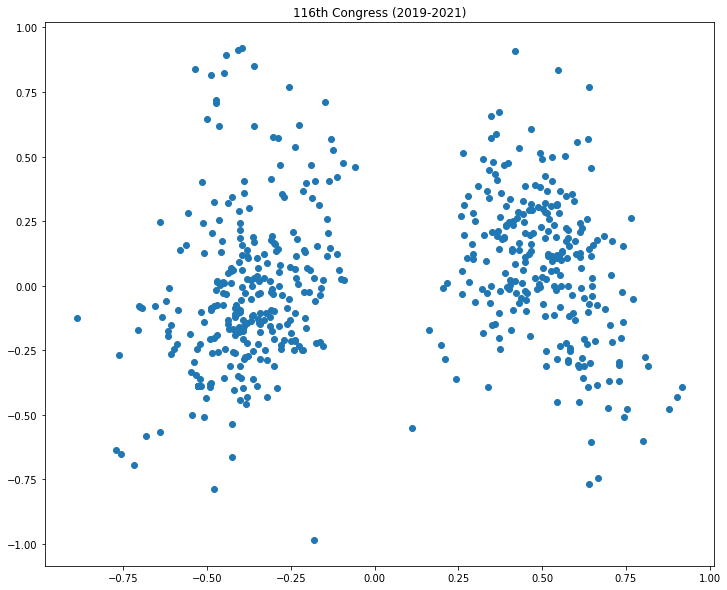

In [114]:
for d in data_all:
    ideology_viz(d)